In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import minimize

$K^{\pm}$ \
Mass $m = 493.677 \pm 0.016$ MeV (S = 2.8) \
Mean life $\tau = (1.2380 \pm 0.0020) * 10^{-8}$ s (S = 1.8) \
$c\tau = 3.711$ m 

 

$\pi^{\pm}$ \
Mass $m = 139.57039 \pm 0.00018$ MeV (S = 1.8) \
Mean life $\tau = (2.6033 \pm 0.0005) * 10^{-8}$ s (S = 1.2) \
$c\tau = 7.8045$ m \
average decay length of $\pi^+ = 4188$ m

$P(x) = \frac{1}{l_p} e^{-\frac{x}{l_p}} ???$

$K(x) = \frac{1}{l_p} e^{-\frac{x}{l_p}} ???$

$T(x) = 0.84 \cdot P(x) + 0.16 \cdot K(x)$

In [19]:
def P(x, l_p):
    return 1/l_p * np.exp(- 1/l_p * x)

def K(x, l_k):
    return 1/l_k * np.exp(- 1/l_k * x)

def PDF(x, l_k):
    l_p = 4188 # m
    return 0.84 * P(x,l_p) + 0.16 * K(x,l_k)

def likelihood_of_data(data, l_k):
    '''
        returns the log of the likelihood because the likelihood gets lower then the computer precision.
    '''
    log_of_likelihood = 0
    for x in data:
        log_of_likelihood += np.log(PDF(x, l_k))
    return log_of_likelihood

def function_to_minimize(variables, data):
    '''
        We want to maximize the likelihood, but can only minimize a function.
        => minimize -likelihood
    '''
    l_k = variables[0]
    return -likelihood_of_data(data, l_k)

   direc: array([[1.]])
     fun: 916722.0339161039
 message: 'Optimization terminated successfully.'
    nfev: 12
     nit: 1
  status: 0
 success: True
       x: array([562.1709879])


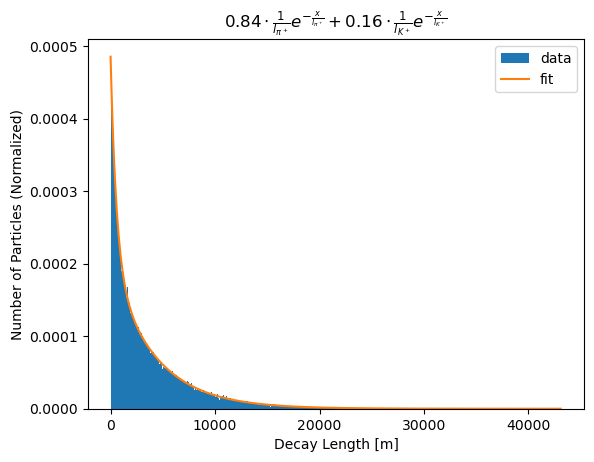

In [41]:

data = np.loadtxt('dec_lengths.txt')

counts, bins, _ = plt.hist(data, bins=500, density=True, label='data')
xdata = bins[:-1]

res = minimize(function_to_minimize, x0=[500], args=(data), method='Powell')
print(res)

# # Calculate the uncertainty in l_k
# hessian = res.hess_inv
# print(hessian)
# l_k_uncertainty = np.sqrt(hessian[0,0])
# print(f"Uncertainty in l_k: {l_k_uncertainty:.2f}")

plt.plot(xdata,PDF(xdata, res.x[0]), label='fit')
plt.xlabel('Decay Length [m]')
plt.ylabel('Number of Particles (normalized)')
plt.title(r'$0.84 \cdot \frac{1}{l_{\pi^+}} e^{-\frac{x}{l_{\pi^+}}} + 0.16 \cdot \frac{1}{l_{K^+}} e^{-\frac{x}{l_{K^+}}}$')
plt.legend()
plt.show()

C:\Users\felix\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == "":


[445.49369473] [6.01710137e+08]


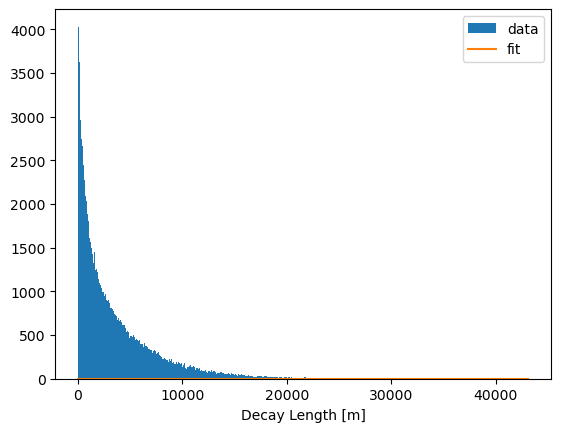

In [27]:
data = np.loadtxt('dec_lengths.txt')

counts, bins, _ = plt.hist(data,bins=500,density=False, label='data')
xdata = bins[:-1]
ydata = counts

def PDF(x, l_k):
    def p(x, l_p):
        return 1/l_p * np.exp(- 1/l_p * x)

    def k(x, l_k):
        return 1/l_k * np.exp(- 1/l_k * x)
    
    l_p = 4188 # m
    return 0.84 * p(x,l_p) + 0.16 * k(x,l_k)

opt_parms, parm_cov = curve_fit(PDF, xdata, ydata, p0=[500])
perr = np.sqrt(np.diag(parm_cov))
print(opt_parms, perr)

plt.plot(xdata, PDF(xdata, opt_parms[0]), label='fit')
plt.xlabel('Decay Length [m]')
plt.legend()
plt.show()